In [1]:
#to suppress all warnings and make more readable the notebook
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [1]:
# add temporalis directory
import sys
sys.path.insert(0, "/media/giuseppec/25F62A4E5FEED162/work/temporalis_update/brightway2-temporalis_last") #new temporalis
# sys.path.insert(0, "/media/giuseppec/25F62A4E5FEED162/work/temporalis_update/brightway2-temporalis") #old temporalis

In [2]:
import warnings
warnings.filterwarnings('ignore')

from brightway2 import *
from bw2temporalis import *
import numpy as np
import pandas as pd
from bw2analyzer import ContributionAnalysis as con
from matplotlib import pyplot as plt

np.set_printoptions(suppress=True) 
%matplotlib inline

np.set_printoptions(precision=2,suppress=True)
%precision 2
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.set_option('display.float_format', 2)



### Here we set the project and create the artificial database

In [3]:
projects.set_current('temporalis_demo')


In [4]:
#DATABASE
#dyanmic
tempo_example={    
('tempo_example', '2'): {
    'code': '2',
    'database': 'tempo_example',
    'name': '2',
    'type': 'process',
    'exchanges': [
            {
            'amount': .4,
            'input': ('tempo_example', '6'),
            'output': ('tempo_example', '2'),
            'temporal distribution': [(-3, .2), (-1, .2)],
            'type': 'technosphere'
            },{
            'amount': 5,
            'temporal distribution': [(-5, 1), (-4, 1.5),(-1, 1.7), (0, 0.8)],
            'input': ('tempo_example', 'c'),
            'output': ('tempo_example', '2'),
            'type': 'biosphere'
            }
                 ],
                            },                                     
('tempo_example', '4'): {
    'code': '4',
    'database': 'tempo_example',
    'name': '4',
    'type': 'process',
    'exchanges': [
            {
            'amount': 0.6,
            'input': ('tempo_static', '1'),
            'output': ('tempo_example', '4'),
            'temporal distribution': [(-1, .2), (0, .4)],
            'type': 'technosphere'
            },{
            'amount': .6,
            'temporal distribution': [(-2, 0.4), (-0, .2)],
            'input': ('tempo_example', '5'),
            'output': ('tempo_example', '4'),
            'type': 'technosphere'
            },
            {
            'amount': 0.3,
            'input': ('tempo_example', '6'),
            'output': ('tempo_example', '4'),
            'temporal distribution': [(-1, .14), (0, .16)],
            'type': 'technosphere'
            },{
            'amount': 3,
            'temporal distribution': [(-2, 1.5), (-1, 0.5),(0, .4), (1, 0.6)],
            'input': ('tempo_example', 'a'),
            'output': ('tempo_example', '4'),
            'type': 'biosphere'
            },{
            'amount': 2,
            'temporal distribution': [(-1, 1),(1, 1)],
            'input': ('tempo_example', 'b'),
            'output': ('tempo_example', '4'),
            'type': 'biosphere'
            }         
                 ],
                        },
('tempo_example', '5'): {
    'code': '5',
    'database': 'tempo_example',
    'name': '5',
    'type': 'process',
    'exchanges': [
            {
            'amount': 10,
            'temporal distribution': [(x,1) for x in range(-10,0)],
            'input': ('tempo_example', 'a'),
            'output': ('tempo_example', '5'),
            'type': 'biosphere'
            }
                 ],
                        }, 
('tempo_example', '6'): {
    'code': '6',
    'database': 'tempo_example',
    'name': '6',
    'type': 'process',
    'exchanges': [
            {
            'amount': .5,
            'input': ('tempo_example', '2'),
            'output': ('tempo_example', '6'),
            'temporal distribution': [(-5, .2), (-4,.3)],
            'type': 'technosphere'
            },{
            'amount': 0.2,
            'input': ('tempo_example', '5'),
            'output': ('tempo_example', '6'),
            'temporal distribution': [(-1, .04), (0, .06),  (1, .1)],
            'type': 'technosphere'
            },{
            'amount': 4,
            'temporal distribution': [(-2, 1), (-1, 1),(0, 1), (1, 1)],
            'input': ('tempo_example', 'b'),
            'output': ('tempo_example', '6'),
            'type': 'biosphere'
            }           
                 ],
                        },                                    
#biosphere
('tempo_example', 'a'): {
    'code': 'a',
    'database': 'tempo_example',
    'name': 'a',
    'type': 'emission',                            
                        },    
('tempo_example', 'b'): {
    'code': 'b',
    'database': 'tempo_example',
    'name': 'b',
    'type': 'emission',                            
                        },
('tempo_example', 'c'): {
    'code': 'c',
    'database': 'tempo_example',
    'name': 'c',
    'type': 'emission',                            
                        },
}

#static
static={('tempo_static', '1'): {
    'code': '1',
    'database': 'tempo_static',
    'name': '1',
    'type': 'process',
    'exchanges': [
            {
            'amount': 0.4,
            'input': ('tempo_static', '3'),
            'output': ('tempo_static', '1'),
            'type': 'technosphere'
            },{
            'amount': 7.5,
            'input': ('tempo_example', 'c'),
            'output': ('tempo_static', '1'),
            'type': 'biosphere'
            }
                 ],
                            },
('tempo_static', '3'): {
    'code': '3',
    'database': 'tempo_static',
    'name': '3',
    'type': 'process',
    'exchanges': [
            {
            'amount': 4,
            'temporal distribution': [(-5, 1), (-2, 1.5),(0, 0.7), (1, 0.8)],
            'input': ('tempo_example', 'a'),
            'output': ('tempo_static', '3'),
            'type': 'biosphere'
            }
                 ],
                        }, 
}

#write databases


st=Database('tempo_static')
st.write(static)

db=Database('tempo_example')
db.write(tempo_example)

#IA method

tempo_ex_met=[(('tempo_example', 'a'), 1),
 (('tempo_example', 'b'), 1),
 (('tempo_example', 'c'), 1)]

met=Method(('tempo','method'))
met.register()
met.write(tempo_ex_met)

Writing activities to SQLite3 database:
0%  100%
[##] | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:
0%   100%
[#######] | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 09/08/2017 17:31:08
  Finished: 09/08/2017 17:31:08
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 2.04
Title: Writing activities to SQLite3 database:
  Started: 09/08/2017 17:31:08
  Finished: 09/08/2017 17:31:08
  Total time elapsed: 00:00:00
  CPU %: 219.20
  Memory %: 2.04


### run static LCA and export A,B,s and g matrix

In [5]:
fu={('tempo_example', '4'):1} 
method=('tempo','method')

# get list of bio flow in the methods
bio_meth=[x[0] for x in Method(method).load()]

In [6]:
lca = LCA(fu, method)
lca.lci()
lca.lcia()
print('score static LCA: ', lca.score)

score static LCA:  19.647500619394705


### Get static matrixes

In [7]:
#reverse dictionaries
act,prod,bio=lca.reverse_dict()

In [8]:
tec=pd.DataFrame(lca.technosphere_matrix.todense())
#change index and col
tec.rename(columns={k:v[1] for k,v in act.items()},inplace=True)
tec.rename(index={k:v[1] for k,v in prod.items()},inplace=True)
tec.sort_index(axis=1,inplace=True);tec.sort_index(axis=0,inplace=True)
tec

,1,2,3,4,5,6
1,1.000,0.000,0.000,-0.600,0.000,0.000
2,0.000,1.000,0.000,0.000,0.000,-0.500
3,-0.400,0.000,1.000,0.000,0.000,0.000
4,0.000,0.000,0.000,1.000,0.000,0.000
5,0.000,0.000,0.000,-0.600,1.000,-0.200
6,0.000,-0.400,0.000,-0.300,0.000,1.000


In [9]:
bio_mat=pd.DataFrame(lca.biosphere_matrix.toarray())
#change index and col
bio_mat.rename(columns={k:v[1] for k,v in act.items()},inplace=True)
bio_mat.rename(index={k:v[1] for k,v in bio.items()},inplace=True)
bio_mat.sort_index(axis=1)

,1,2,3,4,5,6
a,0.000,0.000,4.000,3.000,10.000,0.000
b,0.000,0.000,0.000,2.000,0.000,4.000
c,7.500,5.000,0.000,0.000,0.000,0.000


In [10]:
scaling=pd.DataFrame(lca.supply_array)
scaling.rename(index={k:v[1] for k,v in prod.items()},inplace=True)
scaling.sort_index(axis=0,inplace=True)
scaling


,0
1,0.600
2,0.188
3,0.240
4,1.000
5,0.675
6,0.375


In [11]:
inv=pd.DataFrame(lca.inventory.todense())
#change index and col
inv.rename(columns={k:v[1] for k,v in act.items()},inplace=True)
inv.rename(index={k:v[1] for k,v in bio.items()},inplace=True)
inv.sort_index(axis=1,inplace=True);inv.sort_index(axis=0,inplace=True)
inv
# print(inv.to_latex())

,1,2,3,4,5,6
a,0.000,0.000,0.960,3.000,6.750,0.000
b,0.000,0.000,0.000,2.000,0.000,1.500
c,4.500,0.938,0.000,0.000,0.000,0.000


In [12]:
pd.DataFrame(inv.sum(axis=1))


,0
a,10.710
b,3.500
c,5.438


### run dynamic LCA (the codes of the dynamic LCA algorithm have been modified to print out all the steps of the traversal to be included in the supplementary material

In [13]:
dlca = DynamicLCA(fu, method,cutoff=0.00001,now=np.datetime64('2017-01-01'))
timeline=dlca.calculate()


### Let's first check the difference in the cumulative results between the static and the dynamic LCA using the same LCIA method

In [14]:
#check results
res=timeline.characterize_static(method,cumulative=False)
print("difference in percentage between the two: ", (sum(res[1])-lca.score)/sum(res[1])*100)

difference in percentage between the two:  -0.0016277403491706227


## Validation

`get the process and flows exchange amount both static and the dynamic approach`

In [15]:
# get process in stati LCA (this is the part that need to be uncommented out)
static_pr={x[2][1]:x[1] for x in con().annotated_top_processes(lca,names=False,limit=None) if x[1]!=0}
df_st_pr=pd.DataFrame(list(static_pr.items()), columns=['product', 'static'])
df_st_pr=df_st_pr.round(5)

# get flows in static LCA
static_fl={x[2][1]:x[1] for x in con().annotated_top_emissions(lca,names=False,limit=None) if x[1]!=0 and x[2] in bio_meth}
df_st_fl=pd.DataFrame(list(static_fl.items()), columns=['flow', 'static'])
df_st_fl=df_st_fl.round(5)

In [16]:
# get process in dynamic LCA (this is the part that need to be uncommented out)

dyn_pr={k[1]:v for k,v in dlca.test.items()}
df_dyn_pr=pd.DataFrame(list(dyn_pr.items()), columns=['product', 'dynamic'])
df_dyn_pr=df_dyn_pr.round(5)

# get flows in dynamic LCA
dyn_fl={x[1]:timeline.total_amount_for_flow(x) for x in timeline.flows() if x in bio_meth}
df_dyn_fl=pd.DataFrame(list(dyn_fl.items()), columns=['flow', 'dynamic'])
df_dyn_fl=df_dyn_fl.round(5)

In [17]:
#just to check how many times the loops were iterated
dlca.loops

Counter({('Functional unit', ('tempo_example', '4')): 1,
         (('tempo_example', '6'), ('tempo_example', '5')): 5,
         (('tempo_example', '4'), ('tempo_example', '6')): 1,
         (('tempo_example', '4'), ('tempo_example', '5')): 1,
         (('tempo_example', '2'), ('tempo_example', '6')): 6,
         (('tempo_example', '6'), ('tempo_example', '2')): 6})

`compare the difference in process and flow exchanged between the two (diff is percentage of diff)`

In [18]:
#difference in processes between dynamic and static
pr=df_st_pr.merge(df_dyn_pr,how='left',on='product')
pr['difference (%)']=((pr.dynamic-pr.static)/pr.static)*100
pr=pr.sort_values(['product'],ascending=[True])
pr

,product,static,dynamic,difference (%)
2,1,0.600,0.600,0.000
1,2,0.188,0.187,-0.005
3,3,0.240,nan,nan
5,4,1.000,1.000,0.000
4,5,0.675,0.675,-0.003
0,6,0.375,0.375,0.000


In [19]:
#difference in flows between dynamic and static
fl=df_st_fl.merge(df_dyn_fl,how='left',on='flow')
fl['difference (%)']=((fl.dynamic-fl.static)/fl.dynamic)*100
fl.dropna(subset=['difference (%)'],inplace=True)
fl=fl.sort_values(['flow'],ascending=[True])
fl

,flow,static,dynamic,difference (%)
2,a,10.710,10.710,-0.002
0,b,3.500,3.500,-0.001
1,c,5.438,5.437,-0.001


`plot the environmental interventions by process`

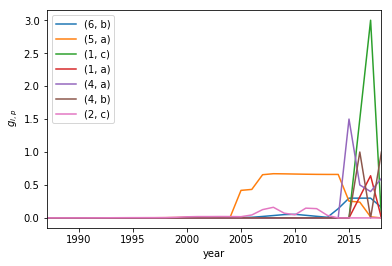

In [23]:
df_pf=pd.DataFrame(index=[int(x) for x in res[0]])
for y in timeline.processes():
    t_pr=timeline.timeline_for_activity(y)
    for x in timeline.flows():
        if len(t_pr.timeline_for_flow(x).raw)>0:
            car=t_pr.timeline_for_flow(x).characterize_static(method,cumulative=False)
            df_pf[y[1],x[1]]=pd.Series(car[1],index=[int(x) for x in car[0]])
df_pf=df_pf.drop(list(range(1966,1987))) #delete extra row
df_pf.fillna(0,inplace=True)
ax=df_pf.plot()#legend=True,figsize=(10,7))

#x-ylabel
ax.set_ylabel(' $g_{i,p}$')#,fontsize=22)
ax.set_xlabel('year')#,fontsize=22)
# plt.savefig('/media/giuseppec/25F62A4E5FEED162/work/papers/temporalis_paper/pictures/bio_by_flow.eps', format='eps',dpi=200,bbox_inches='tight')
plt.savefig('/media/giuseppec/25F62A4E5FEED162/work/papers/temporalis_paper/pictures/bio_by_flow.png', format='png',dpi=200,bbox_inches='tight')

# gi,p

`plot cumulative interventions`


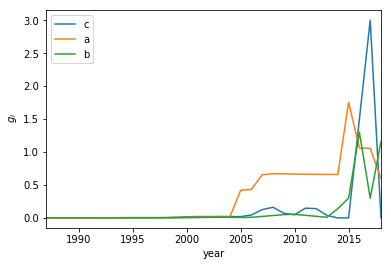

In [24]:
df_flow=pd.DataFrame(index=[int(x) for x in res[0]])
for x in timeline.flows():
    car=timeline.timeline_for_flow(x).characterize_static(method,cumulative=False)
    df_flow[x[1]]=pd.Series(car[1],index=[int(x) for x in car[0]])
df_flow=df_flow.drop(list(range(1966,1987))) #delete extra row
df_flow.fillna(0,inplace=True)
ax=df_flow.plot()

#x-ylabel
ax.set_ylabel(' $g_{i}$')#,fontsize=22)
ax.set_xlabel('year')#,fontsize=22)
# plt.savefig('/media/giuseppec/25F62A4E5FEED162/work/papers/temporalis_paper/pictures/bio.eps', format='eps',dpi=200,bbox_inches='tight')
plt.savefig('/media/giuseppec/25F62A4E5FEED162/work/papers/temporalis_paper/pictures/bio.png', format='png',dpi=200,bbox_inches='tight')


`The cells below are used for the paper`

In [7]:
#just get TD of the database
for k,v in tempo_example.items():
    if 'exchanges' in v:
        for exc in v['exchanges']:
            if 'temporal distribution' in exc:
                array = np.array(exc[u'temporal distribution'])
                print(exc.get('input')[1],'to',v['name'],array[:, 0], array[:, 1],exc.get('amount'))
    
for k,v in static.items():
    if 'exchanges' in v:
        for exc in v['exchanges']:
            print(exc.get('input')[1],'to',v['name'],exc.get('amount'))

6 to 2 [-3. -1.] [ 0.2  0.2] 0.4
c to 2 [-5. -4. -1.  0.] [ 1.   1.5  1.7  0.8] 5
1 to 4 [-1.  0.] [ 0.2  0.4] 0.6
5 to 4 [-2.  0.] [ 0.4  0.2] 0.6
6 to 4 [-1.  0.] [ 0.14  0.16] 0.3
a to 4 [-2. -1.  0.  1.] [ 1.5  0.5  0.4  0.6] 3
b to 4 [-1  1] [1 1] 2
a to 5 [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1] [1 1 1 1 1 1 1 1 1 1] 10
2 to 6 [-5. -4.] [ 0.2  0.3] 0.5
5 to 6 [-1.  0.  1.] [ 0.04  0.06  0.1 ] 0.2
b to 6 [-2 -1  0  1] [1 1 1 1] 4
3 to 1 0.4
c to 1 7.5
a to 3 4


In [14]:
#convert matrix into latex format for paper
def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)
# inv.as_matrix()
# A = np.array([[12, 5, 2], [20, 4, 8], [ 2, 4, 3], [ 7, 1, 10]])

# for x in [tec,bio_mat,inv,scaling]:
print('$\nA=',bmatrix(tec.as_matrix()))
print('B=',bmatrix(bio_mat.as_matrix()))
# print('s=',bmatrix(scaling.as_matrix()))
# print('g=',bmatrix(bio_mat.as_matrix()) + '\n$')

# B = np.array([[1.2], [3.7], [0.2]])
# print bmatrix(B) + '\n'

# C = np.array([1.2, 9.3, 0.6, -2.1])
# print bmatrix(C) + '\n'

$
A= \begin{bmatrix}
  1. & 0. & 0. & -0.6 & 0. & 0.\\
  0. & 1. & 0. & 0. & 0. & -0.5\\
  -0.4 & 0. & 1. & 0. & 0. & 0.\\
  0. & 0. & 0. & 1. & 0. & 0.\\
  0. & 0. & 0. & -0.6 & 1. & -0.2\\
  0. & -0.4 & 0. & -0.3 & 0. & 1.\\
\end{bmatrix}
B= \begin{bmatrix}
  0. & 3. & 10. & 0. & 0. & 4.\\
  0. & 2. & 0. & 4. & 0. & 0.\\
  5. & 0. & 0. & 0. & 7.5 & 0.\\
\end{bmatrix}
